# TP Analyse en composantes principales

# 1 Preliminary



*   LAGHJAJ ABDELLATIF
*   BOUAAZA FATIM EZZAHRA






## 1.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns

#charger seaborn
sns.set()

## 1.2 Data

In [2]:
df = pd.read_csv("formations.csv", decimal=".", index_col=0)
df

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
Titre de la formation,,,,,,,,,,
Classification_et_segmentation_donnees,29,34,NaN,15.0,3,11,0.666667,3,22,4470531
Statistique_inferentielle,55,4,86.0,12.0,2,21,0.750000,4,8,4525306
Probabilite,60,100,NaN,NaN,1,1,NaN,0,89,4525296
Python_pour_la_Data_Science,64,64,96.0,10.0,2,8,0.000000,2,57,4452741
Devenez_mentor_sur_OpenClassrooms,76,100,91.0,6.0,1,12,1.000000,3,29,3595541
Langage_SQL,192,14,92.0,20.0,2,25,0.500000,4,25,4449026
Developpement_informatique,192,80,NaN,2.0,1,3,NaN,0,145,4057661
Regression_lineaire,193,65,84.0,10.0,2,9,0.500000,2,182,4444646
Algorithmes_non_supervises,193,75,85.0,15.0,3,13,0.666667,3,22,4379436


# 2 Data Preparation

## 2.1 Quick tour

In [3]:
# Affiche les 5 premières lignes du DataFrame.
df.head()

# Affiche les 5 dernières lignes du DataFrame.
df.tail()

# Retourne les dimensions (nombre de lignes et de colonnes) du DataFrame.
df.shape

# Donne des informations globales sur le DataFrame, y compris les types de données, les valeurs non nulles
df.info()

# Retourne la proportion de valeurs manquantes pour chaque colonne du DataFrame.
df.isna().mean()

# Retourne le nombre de lignes en double dans le DataFrame.
df.duplicated().sum()

# Retourne le nombre de valeurs uniques dans chaque colonne du DataFrame.
df.nunique()

# Retourne des statistiques descriptives sur les colonnes numériques du DataFrame,
# telles que la moyenne, l'écart-type, les quartiles, et les valeurs extrêmes.
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Classification_et_segmentation_donnees to Framework_Symfony
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inscription          19 non-null     int64  
 1   progression          19 non-null     int64  
 2   moyenneDeClasse      15 non-null     float64
 3   duree                18 non-null     float64
 4   difficulte           19 non-null     int64  
 5   nbChapitres          19 non-null     int64  
 6   ratioQuizEvaluation  16 non-null     float64
 7   nbEvaluations        19 non-null     int64  
 8   derniereMiseAJour    19 non-null     int64  
 9   idCours              19 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 1.6+ KB


,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
count,19.000000,19.000000,15.000000,18.000000,19.000000,19.000000,16.000000,19.000000,19.000000,1.900000e+01
mean,235.473684,44.052632,89.400000,15.000000,1.894737,15.210526,0.617560,2.947368,78.578947,3.967983e+06
std,167.684349,36.326412,3.996427,10.318459,0.657836,9.223032,0.246053,1.715086,63.453671,1.075638e+06
min,29.000000,2.000000,84.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,2.353440e+05
25%,134.000000,4.000000,85.500000,8.500000,1.500000,8.500000,0.500000,2.000000,22.000000,4.056556e+06
50%,195.000000,44.000000,90.000000,13.500000,2.000000,13.000000,0.666667,3.000000,61.000000,4.421146e+06
75%,310.500000,70.000000,92.000000,20.000000,2.000000,20.500000,0.750000,4.000000,146.500000,4.469006e+06
max,713.000000,100.000000,96.000000,40.000000,3.000000,38.000000,1.000000,7.000000,186.000000,4.525306e+06


## 2.2 Data selection

In [4]:
# Supprime les colonnes "derniereMiseAJour" et "idCours" du DataFrame.
df = df.drop(columns=["derniereMiseAJour", "idCours"])

# Affiche les 5 premières lignes du DataFrame après la suppression des colonnes.
df.head()

# Affiche les dimensions mises à jour du DataFrame après la suppression des colonnes.
df.shape

(19, 8)

## 2.3 Data imputation

In [5]:
# Retourne le pourcentage de valeurs manquantes pour chaque colonne du DataFrame.
df.isna().mean()

"""
  🚨 -- ATTENTION --
  Dans notre cas, nous pouvons simplement imputer les valeurs manquantes par la
  moyenne. Cela n'est pas la meilleure chose à faire, mais c'est la plus rapide! Mieux que
  de les supprimer en tout cas!
"""

# Impute les valeurs manquantes par la moyenne de chaque colonne.
df = df.fillna(df.mean())

# Affiche le pourcentage de valeurs manquantes après l'imputation.
df.isna().mean()

# Stocke les étiquettes des lignes (noms) dans la variable 'names'.
names = df.index

# Stocke les noms des colonnes (caractéristiques) dans la variable 'features'.
features = df.columns

print("Names", names)
print("Faetures", features)

Names Index(['Classification_et_segmentation_donnees', 'Statistique_inferentielle',
       'Probabilite', 'Python_pour_la_Data_Science',
       'Devenez_mentor_sur_OpenClassrooms', 'Langage_SQL',
       'Developpement_informatique', 'Regression_lineaire',
       'Algorithmes_non_supervises', 'Nettoyez_votre_jeu_de_donnees',
       'Data_warehouse', 'Developpement_mobile', 'Maitriser_excel',
       'BDD_avec_UML', 'Programmer_en_Python', 'Introduction_data_mining',
       'Introduction_reseau_neurone', 'FaceBook_ads', 'Framework_Symfony'],
      dtype='object', name='Titre de la formation')
Faetures Index(['inscription', 'progression', 'moyenneDeClasse', 'duree', 'difficulte',
       'nbChapitres', 'ratioQuizEvaluation', 'nbEvaluations'],
      dtype='object')


# 3 About PCA

## 3.1 Scaling

In [6]:
# Crée une instance du StandardScaler.
scaler = StandardScaler()

# Entraîne et transforme les données en données centrées réduites.
df_scaled = scaler.fit_transform(df)

# Convertit les données en DataFrame Pandas.
df_scaled = pd.DataFrame(df_scaled)

# Affiche les 5 premières lignes du DataFrame avec les données normalisées.
df_scaled.head()

# Calcule et affiche la moyenne et l'écart-type des données normalisées pour chaque colonne.
df_scaled.describe().round(2).loc[["mean", "std"], :]

,0,1,2,3,4,5,6,7
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.03,1.03,1.03,1.03,1.03,1.03,1.03,1.03


**Si les données ne sont pas centrées et réduites (normalisées) avant l'application de certaines méthodes statistiques ou algorithmes, cela peut entraîner plusieurs problèmes**

## 3.2 PCA

In [7]:
# Spécifie le nombre de composantes principales à conserver.
n_components = 6

# Crée une instance de PCA avec le nombre spécifié de composantes principales.
pca = PCA(n_components)

# Entraîne le modèle PCA sur les données normalisées.
pca.fit(df_scaled)

PCA(n_components=6)

## 3.3 Explained variance & scree plot

In [8]:
# Variance expliquée par chaque composante
print(pca.explained_variance_)

# Proportion de variance expliquée par chaque composante
print(pca.explained_variance_ratio_)

[3.98235273 1.32164346 1.15493328 1.00562514 0.35027821 0.25694061]
[0.4715944  0.15651041 0.13676841 0.11908719 0.04148031 0.03042718]


crée un DataFrame (eig) pour afficher des informations sur les facteurs extraits de l'analyse en composantes principales (PCA). Voici une explication des colonnes :

* **"Facteurs"** : Cette colonne représente les facteurs extraits, étiquetés de "F1" à "F6".

* **"Inertie"** : Cette colonne affiche la variance expliquée par chaque facteur. Les valeurs sont arrondies à deux décimales.

* **"Inertie expliquée"** : Cette colonne montre la proportion de variance expliquée par chaque facteur, exprimée en pourcentage.

* **"% cum. Iner. expliquée"** : Cette colonne présente le pourcentage cumulatif de la variance expliquée jusqu'à chaque facteur.

In [9]:
eig =pd.DataFrame({
  "Facteurs" : ["F" + str(x + 1) for x in range(6)],
  "Inertie" : pca.explained_variance_.round(2),
  "Inertie expliquée" : np.round(pca.explained_variance_ratio_ * 100),
  "% cum. Iner. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
})

eig

,Facteurs,Inertie,Inertie expliquée,% cum. Iner. expliquée
0,F1,3.98,47.0,47.0
1,F2,1.32,16.0,63.0
2,F3,1.15,14.0,76.0
3,F4,1.01,12.0,88.0
4,F5,0.35,4.0,93.0
5,F6,0.26,3.0,96.0


**Que remarquer vous ?** \\
En analysant les résultats de l'analyse en composantes principales:

1. Les trois premières composantes principales expliquent une part significative de la variance totale.
2. La première composante principale seule explique près de la moitié de la variance totale.
3. La contribution à la variance diminue pour les composantes suivantes.
4. Il pourrait être judicieux de considérer les trois premières composantes principales pour une réduction de dimension tout en conservant une quantité significative d'information.

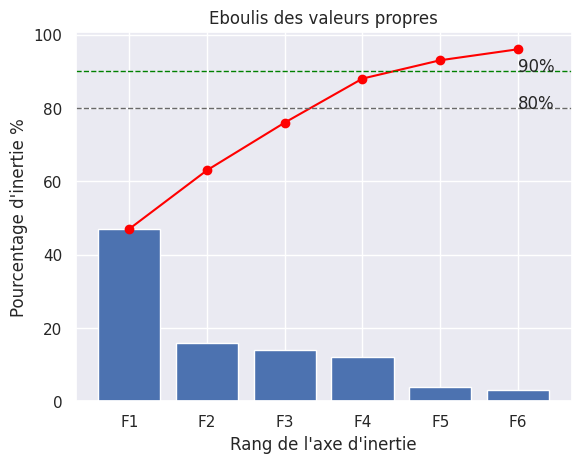

In [10]:
# Diagramme en barres des facteurs
plt.bar(eig.iloc[:, 0], eig.iloc[:, 2])

# Courbe de l'inertie expliquée cumulée en rouge avec des points
plt.plot(eig.iloc[:, 0], eig.iloc[:, 3], c="red", marker='o')

# Ligne en pointillés à 80% de l'inertie expliquée
plt.axhline(y=80, linewidth=1, color="dimgray", linestyle="--")
# Texte "80%" à l'endroit de l'axe horizontal 5 (F6)
plt.text(5, 80, "80%")

# Ligne en pointillés à 90% de l'inertie expliquée
plt.axhline(y=90, linewidth=1, color="green", linestyle="--")
# Texte "90%" à l'endroit de l'axe horizontal 5 (F6)
plt.text(5, 90, "90%")

# Étiquettes des axes et titre du graphique
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie %")
plt.title("Eboulis des valeurs propres")

# Affiche le graphique
plt.show()

# Commenter le résultat obtenu . Combien de composantes faut-il retenir ?
Le graphique **"Eboulis des valeurs propres** indique que les trois premières composantes principales capturent une proportion significative de la variance totale, atteignant environ **77%** d'inertie expliquée cumulée. Il semble raisonnable de retenir **3 composantes principales** pour équilibrer la réduction de dimension et la préservation de l'information, surtout lorsque l'on considère le seuil de **80%** d'inertie expliquée.

## 3.4 Components

In [11]:
# Calcul des composantes principales
pcs = pca.components_

# Création d'un DataFrame avec les composantes principales
pcs = pd.DataFrame(pcs)

# Renommer les colonnes avec les noms des variables d'origine
pcs.columns = features

# Renommer les lignes avec les noms des composantes principales (F1, F2, ..., F6)
pcs.index = [f"F{i}" for i in range(1, n_components+1)]

# Transposer le DataFrame pour une meilleure lisibilité
pcs.T

,F1,F2,F3,F4,F5,F6
inscription,0.232291,0.138551,-0.232911,0.844563,-0.101944,-0.241783
progression,-0.453036,-0.095709,-0.181312,0.173451,0.103747,-0.280837
moyenneDeClasse,-0.084496,0.505901,0.749591,-0.003742,0.042800,-0.345714
duree,0.448654,-0.119464,0.025781,-0.003797,0.704342,-0.382050
difficulte,0.331149,-0.567023,0.097971,-0.251135,-0.330498,-0.447063
nbChapitres,0.464390,0.148200,0.001625,-0.031956,0.254768,0.522320
ratioQuizEvaluation,0.081035,0.559942,-0.577726,-0.437075,-0.039596,-0.352665
nbEvaluations,0.447756,0.210767,0.083419,0.038423,-0.552459,0.011602


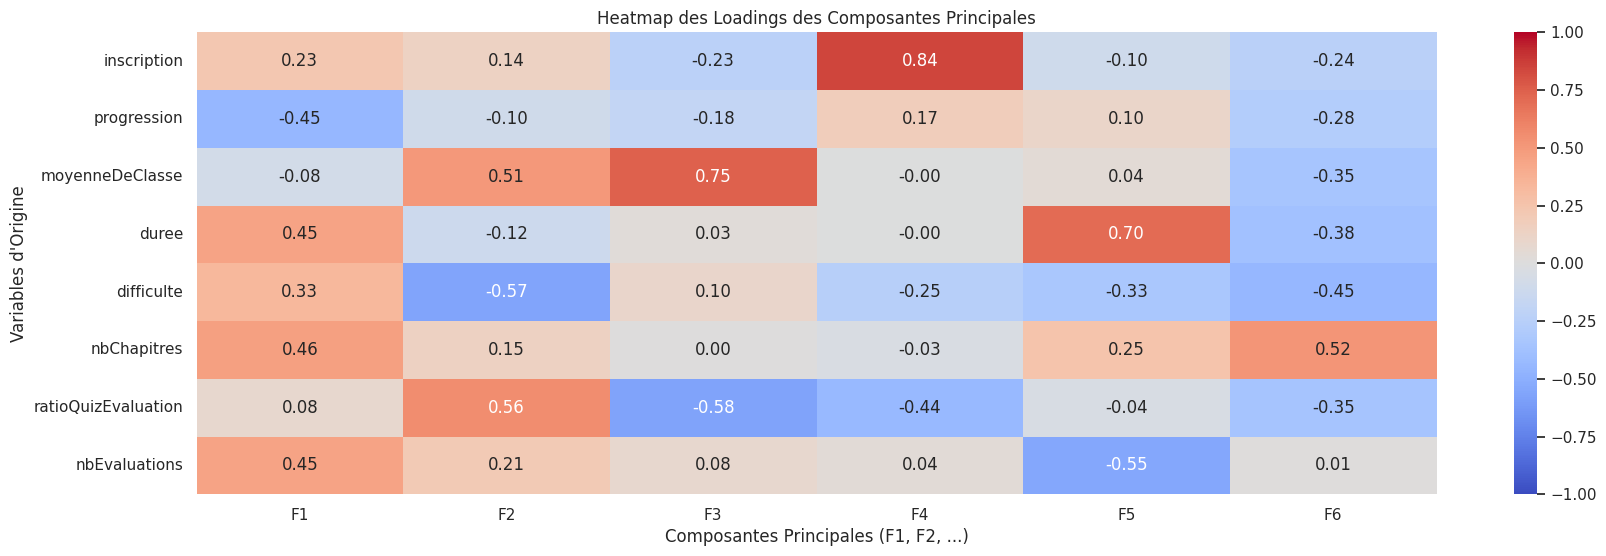

In [12]:
# Création d'une figure avec un axe de taille spécifiée
fig, ax = plt.subplots(figsize=(20, 6))

# Utilisation de Seaborn pour créer une heatmap
# pcs.T transpose la matrice pour avoir les variables d'origine sur l'axe des x
# vmin et vmax définissent la plage de valeurs de la colormap (-1 à 1 dans ce cas)
# annot=True affiche les valeurs sur les cellules
# cmap spécifie la colormap utilisée (coolwarm dans ce cas)
# fmt="0.2f" formate les valeurs avec deux décimales
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

# Ajout d'étiquettes d'axe et d'un titre
plt.xlabel("Composantes Principales (F1, F2, ...)")
plt.ylabel("Variables d'Origine")
plt.title("Heatmap des Loadings des Composantes Principales")

# Affiche la heatmap
plt.show()

## 3.5 Correlation graph

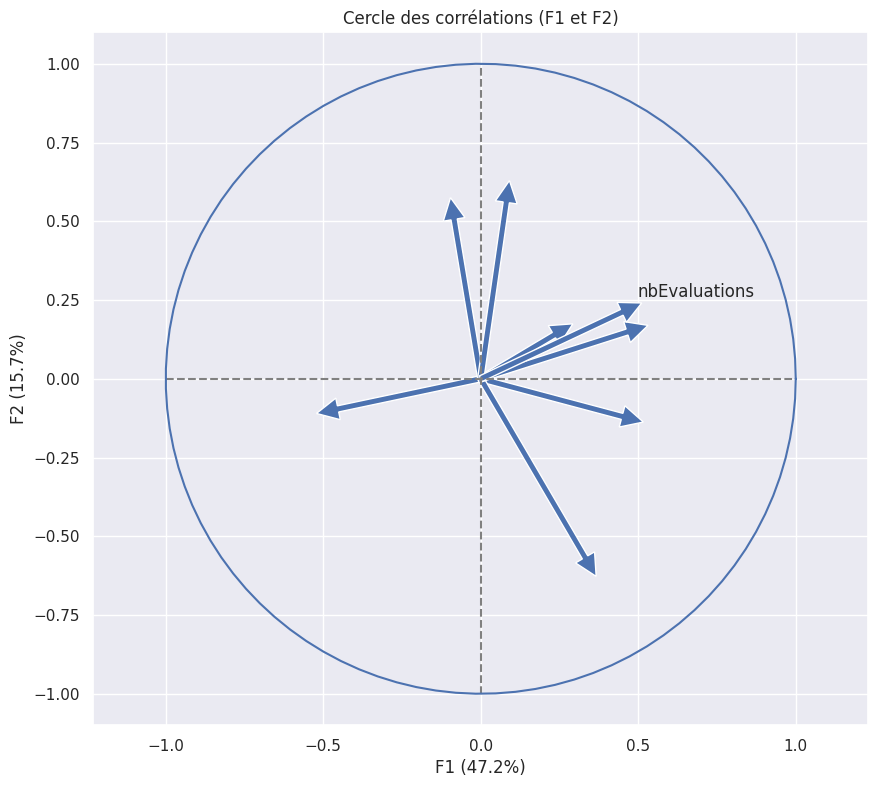

In [13]:
def correlation_graph(pca, x_y, features) :
  """Affiche le graphe des correlations
  Positional arguments :
  -----------------------------------
  pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
  x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
  features : list ou tuple : la liste des features (ie des dimensions) à représenter
  """
  # Extrait x et y
  x,y=x_y
  # Taille de l'image (en inches)
  fig, ax = plt.subplots(figsize=(10, 9))
  # Pour chaque composante :
  for i in range(0, pca.components_.shape[1]):
    # Les flèches
    ax.arrow(0,0,
    pca.components_[x, i],
    pca.components_[y, i],
    head_width=0.07,
    head_length=0.07,
    width=0.02, )
  # Les labels
  plt.text(pca.components_[x, i] + 0.05,
  pca.components_[y, i] + 0.05,
  features[i])
  # Affichage des lignes horizontales et verticales
  plt.plot([-1, 1], [0, 0], color='grey', ls='--')
  plt.plot([0, 0], [-1, 1], color='grey', ls='--')
  # Nom des axes, avec le pourcentage d'inertie expliqué
  plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
  plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
  # J'ai copié collé le code sans le lire
  plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))
  # Le cercle
  an = np.linspace(0, 2 * np.pi, 100)

  plt.plot(np.cos(an), np.sin(an)) # Add a unit circle for scale
  # Axes et display
  plt.axis('equal')
  plt.show(block=False)

x_y = (0,1) #pour F1 et F2
correlation_graph(pca, x_y, features)

## 3.6 Projection

# 4 Conclusion